<a href="https://colab.research.google.com/github/danishziasiddique/Cat-or-Dog---Image-Classification-Using-CNN/blob/main/Cat_or_Dog_Cassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 189MB/s]
100% 1.06G/1.06G [00:08<00:00, 138MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [5]:
# Generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels =  'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [7]:
# Create CNN model


model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 87ms/step - loss: 0.7524 - accuracy: 0.6352 - val_loss: 0.6033 - val_accuracy: 0.6674
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.5334 - accuracy: 0.7362 - val_loss: 0.5213 - val_accuracy: 0.7362
Epoch 3/10
625/625 [==============================] - 58s 91ms/step - loss: 0.4406 - accuracy: 0.7918 - val_loss: 0.5678 - val_accuracy: 0.7388
Epoch 4/10
625/625 [==============================] - 53s 85ms/step - loss: 0.3634 - accuracy: 0.8357 - val_loss: 0.6083 - val_accuracy: 0.7398
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.2764 - accuracy: 0.8812 - val_loss: 0.6566 - val_accuracy: 0.7124
Epoch 6/10
625/625 [==============================] - 56s 88ms/step - loss: 0.1932 - accuracy: 0.9233 - val_loss: 0.7152 - val_accuracy: 0.7428
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1304 - accuracy: 0.9495 - val_loss: 0.7856 - val_accuracy:

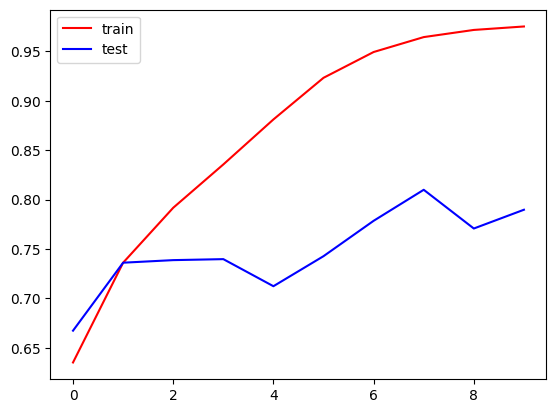

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

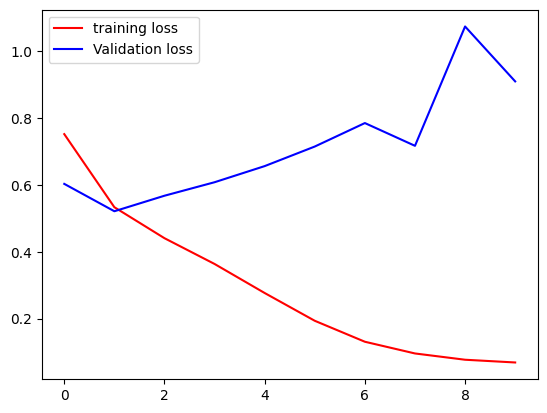

In [12]:
plt.plot(history.history['loss'], color='red', label='training loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation loss')
plt.legend()
plt.show()

In [13]:
import cv2

In [22]:
test_img = cv2.imread('/content/dog.jpeg')

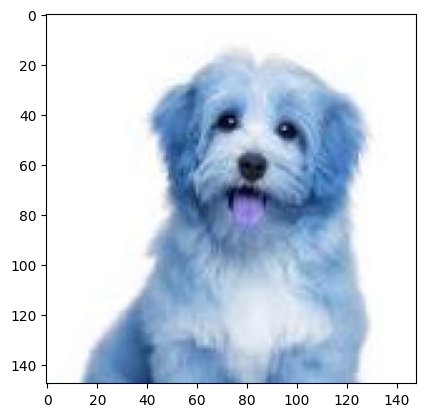

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(148, 148, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [26]:
test_input = test_img.reshape(1,256,256,3)

In [33]:
output = model.predict(test_input)
if output[0][0] == 1:
  print("The image is of a dog")
else:
  print("The image is of a cat")



1/1 [==============================] - 0s 75ms/step
The image is of a dog
